In [320]:
import pandas as pd
from tkinter import Tk, filedialog
import ast
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from tabulate import tabulate
import pprint 
import json

In [321]:
# Create Tk root
root = Tk()

# Hide the main window
root.withdraw()

# Set the main window to be always on top
root.call('wm', 'attributes', '.', '-topmost', True)

# Ask user to select CSV files
csv_paths = filedialog.askopenfilename(multiple=True, title='Select CSV files', filetypes=[('CSV files', '*.csv')])

# Initialize a list to store DataFrames for each selected CSV file
data_frames = []

# Iterate over each selected CSV file path
for csv_path in csv_paths:
    df = pd.read_csv(csv_path, sep=';')
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)
combined_df.update(combined_df.applymap(lambda x: x.strip() if isinstance(x, str) else x))

# Now combined_df contains data from all selected CSV files
#print(combined_df)

In [322]:
# Define a list to store all selections and filtering criteria
filtering_criteria = []

print("Available headers:")
for idx, header in enumerate(combined_df.columns):
    print(f"{idx}: {header}")

# Prompt the user to choose a header by its number
header_number = int(input("Enter the number of the header you want to filter by: "))

# Check if the selected header is "array" and ask for input again if it is
while combined_df.columns[header_number] == "array":
    print("Sorry, you cannot select the 'array' column.")
    header_number = int(input("Enter the number of the header you want to filter by: "))

selected_header = combined_df.columns[header_number]

# Append the selected header to filtering_criteria
filtering_criteria.append(f"Selected Header: {selected_header}")

filter_value = input(f"Enter the value to filter by {selected_header}: ")

# Append the filter value to filtering_criteria
filtering_criteria.append(f"Filter Value: {filter_value}")

# Filtering rows based on the selected header and filter value
matching_rows = combined_df[combined_df[selected_header] == filter_value]

# Extracting the headers in the original order from the DataFrame
original_headers = matching_rows.columns.tolist()

print("Matching Rows:")
print(len(matching_rows))

# Display all selections and filtering criteria
print("\nAll Selections and Filtering Criteria:")
for criterion in filtering_criteria:
    print(criterion)



Available headers:
0: Mouse
1: Genotype
2: Date
3: Selected Behavior
4: Sham
5: Session Number
6: Fiber Connection
7: Right Turn Array
8: Right Turn Array Continue
9: Total Right Turn Bout Count
10: Total Right Turn Stim Count
11: Average Duration of Right Turn
12: Total Right Turn Stim in Stim Block
13: Total Right Turn Bouts in Stim Block
14: Right Turn Average Duration in Stim Block
15: Locomotion Array
16: Locomotion Array Continue
17: Total Locomotion Bout Count
18: Total Locomotion Stim Count
19: Average Duration of Locomotion
20: Total Locomotion Stim in Stim Block
21: Total Locomotion Bouts in Stim Block
22: Locomotion Average Duration in Stim Block
23: Face Groom Array
24: Face Groom Array Continue
25: Total Face Groom Bout Count
26: Total Face Groom Stim Count
27: Average Duration of Face Groom
28: Total Face Groom Stim in Stim Block
29: Total Face Groom Bouts in Stim Block
30: Face Groom Average Duration in Stim Block
Enter the number of the header you want to filter by: 1
E

In [323]:
def get_possible_indices(tuples):
    index_to_label = {
        0: "Behavior,0",
        1: "Stim Count,1",
        2: "Frame Rate,2",
        3: "Bouts,3",
        4: "Duration,4", 
        5: "Start Time,5", 
        6: "End Time,6"

    }
    if tuples and isinstance(tuples[0], tuple):
        return [index_to_label[i] if i in index_to_label else f"Unknown Label {i}" for i in range(len(tuples[0]))]
    return []

def get_possible_indices_integers(tuples):
    if tuples and isinstance(tuples[0], tuple):
        return list(range(len(tuples[0])))
    return []

original_matching_rows = matching_rows.copy()

while True:
    start_filtering = input("Do you want to start filtering? (y/n): ")
    if start_filtering.lower() != 'y':
        print("Filtering process cancelled.")
        break
    
    print("\nAvailable headers:")
    for idx, header in enumerate(matching_rows.columns):
        print(f"{idx}: {header}")

    try:
        header_number = int(input("Enter the number of the header you want to filter by: "))
        
        if 0 <= header_number < len(matching_rows.columns):
            selected_header = matching_rows.columns[header_number]
            header_words = selected_header.split()
            filtering_criteria.append(f"Selected Header: {selected_header}")
            print(selected_header)
            
            substring = 'Array'
            if substring in selected_header:
                print(f"The substring '{substring}' was found in the header.")
            else:
                print(f"The substring '{substring}' was not found in the header.")

            if 'Array' in selected_header:
                tuple_cells = matching_rows[selected_header].tolist()
                int_1 = []

                for subli in tuple_cells:
                    intermediate = subli.strip('][').split('][')
                    int_1.append(intermediate)

                tuples_list = [[tuple(float(value) if '.' in value else int(value) for value in s.split(',')) for s in inner_list] for inner_list in int_1]
                #for x in tuples_list:
                    #print('Tuples List Before',len(x))
                # Find the index of selected_header in the column headers
                if selected_header in matching_rows.columns:
                    header_index = matching_rows.columns.get_loc(selected_header)

                    # Check if the next column index is valid
                    if header_index + 1 < len(matching_rows.columns):
                        next_column_name = matching_rows.columns[header_index + 1]
                        matching_columns_next = matching_rows[next_column_name]
                        tuple_cells_2 = matching_columns_next.tolist()
                        int_2 = []

                        for subli in tuple_cells_2:
                            intermediate = subli.strip('][').split('][')
                            int_2.append(intermediate)

                    tuples_list_2 = [[tuple(float(value) if '.' in value else int(value) for value in s.split(',')) for s in inner_list] for inner_list in int_2]
            
                    values_added = False  # Initialize a flag to track if values were added

                    # Check the length of each tuple in tuplesst_2
                    for index, value in enumerate(tuples_list_2):
                        if len(value)== 1:
                            continue  # Skip single-value tuples

                        # Check if the index is within the bounds of tuples_list
                        if index < len(tuples_list):
                            tuples_list[index].extend(value)
                            values_added = True  # Set the flag to True if values were added
                                    # Check if values were added and inform the user
                    if values_added:
                        print("Values were added to tuples_list from tuples_list_2.")
                    else:
                        print("No values were added to tuples_list from tuples_list_2.")
                        
                    #for x in tuples_list:
                        #print('Tuples List After:', len(x))

                row_index_to_values = {}
                # Create a dictionary that associates row indices with values from tuples_list
                for row_index, row_data in enumerate(matching_rows.itertuples(), start=0):
                    row_identifier = row_data.Index  # Get the row identifier (usually the index)
                    row_index_to_values[row_identifier] = tuples_list[row_index]
                #for row_index, values in row_index_to_values.items():
                    #print(f"Row Index: {row_index}, Values: {values}")

                possible_indices = get_possible_indices(tuples_list[0])
                print("\nAvailable indices for the elements within tuples:")
                print(possible_indices)
                possible_indices_integers = get_possible_indices_integers(tuples_list[0])
                
                selected_indices_str = input("Enter the indices of the elements within each tuple to filter by (comma-separated): ")
                selected_indices = [int(idx.strip()) for idx in selected_indices_str.split(',')]
                selected_indices_with_range = []
                
                for selected_index in selected_indices:
                    if selected_index == 5 or selected_index == 6:
                        selected_indices_with_range.append(selected_index)
                    elif selected_index in possible_indices_integers:
                        selected_indices_with_range.append(selected_index)
                    else:
                        print(f"Invalid tuple element index {selected_index}. Skipping.")
                # Append selected indices to filtering_criteria
                filtering_criteria.append(f"Selected Indices: {selected_indices_with_range}") 
                
                if 5 in selected_indices_with_range or 6 in selected_indices_with_range:
                    range_filtering = input("Do you want to filter by an exact value or a range for index 5 or 6? (exact/range): ").lower()
                    if range_filtering == 'range':
                        range_min = int(input("Enter the minimum value of the range: "))
                        range_max = int(input("Enter the maximum value of the range: "))
                        # Append selected indices to filtering_criteria
                        filtering_criteria.append(f"Selected Indices: {selected_indices_with_range}")
                        matching_tuples = {}
                        for row_index, values in row_index_to_values.items():
                            for current_tuple in values:
                                value_at_selected_index = current_tuple[selected_index]
                                if range_min <= value_at_selected_index <= range_max:
                                    if row_index not in matching_tuples:
                                        matching_tuples[row_index] = []
                                        matching_tuples[row_index].append(current_tuple)
                                    else:
                                        matching_tuples[row_index].append(current_tuple)
                                        
                        if len(matching_tuples) > 0:
                            mask = []
                            for x in tuples_list:
                                found_true_for_tuple = False

                                for current_tuple in x:
                                    value_at_selected_index = current_tuple[selected_index]
                                    if range_min <= value_at_selected_index <= range_max:
                                        mask.append(True)
                                        found_true_for_tuple = True
                                        break

                                if not found_true_for_tuple:
                                    mask.append(False)

                            indices_to_keep = [i for i, value in enumerate(mask) if value]
                            filtered_matching_rows = matching_rows[matching_rows.index.isin(indices_to_keep)]
                            matching_rows = filtered_matching_rows
                            original_matching_rows = matching_rows.copy()
                        else:
                            print("There are no matching tuples and no matching rows")
                            if len(matching_rows) == 0:
                                matching_rows = original_matching_rows.copy()
                                print('Matching Rows Data Frame Updated to Last Successful Filter')

                    else:
                        user_input = input("Enter the value to filter by in the selected element at index 5 or 6 (or 'all' to select all): ")
                        if user_input.lower() == 'all':
                            matching_tuples = {}
                            for row_index, values in row_index_to_values.items():
                                for current_tuple in values:
                                    if row_index not in matching_tuples:
                                        matching_tuples[row_index] = []
                                        matching_tuples[row_index].append(current_tuple)
                                    else:
                                        matching_tuples[row_index].append(current_tuple)
                                                
                        else:
                            try:
                                user_input = int(user_input)
                                matching_tuples = {}
                                for row_index, values in row_index_to_values.items():
                                    for current_tuple in values:
                                        value_at_selected_index = current_tuple[selected_index]
                                        if value_at_selected_index == user_input:
                                            if row_index not in matching_tuples:
                                                matching_tuples[row_index] = []
                                                matching_tuples[row_index].append(current_tuple)
                                            else:
                                                matching_tuples[row_index].append(current_tuple)
                                                
                                if len(matching_tuples) > 0:
                                    mask = []
                                    for x in tuples_list:
                                        found_true_for_tuple = False

                                        for current_tuple in x:
                                            value_at_selected_index = current_tuple[selected_index]
                                            if value_at_selected_index == user_input:
                                                mask.append(True)
                                                found_true_for_tuple = True
                                                break

                                        if not found_true_for_tuple:
                                            mask.append(False)

                                    indices_to_keep = [i for i, value in enumerate(mask) if value]
                                    filtered_matching_rows = matching_rows[matching_rows.index.isin(indices_to_keep)]
                                    matching_rows = filtered_matching_rows
                                    original_matching_rows = matching_rows.copy()
                                    print('Matching Rows Data Frame and Original Copy Data Frame Are Updated')
                                else:
                                    print("There are no matching tuples and no matching rows")
                                    if len(matching_rows) == 0:
                                        matching_rows = original_matching_rows.copy()
                                        print('Matching Rows Data Frame Replaced with Last Successful Filter')

                            except ValueError:
                                print(f"Invalid input for index 5 or 6. Please enter a valid value of the expected data type.")

                else:
                    for selected_index in selected_indices_with_range:
                        if selected_index != 5 or selected_index != 6:
                            example_tuple = tuples_list[0]
                            for x in example_tuple[:7]:
                                print("Examples Tuples:", x)

                            values = set()
                            for x in tuples_list:
                                for y in x:
                                    if len(y) > selected_index:
                                        values.add(y[selected_index])
                            print(f"\nPreview of possible values for the selected element at index {selected_index}:")
                            print(values)
                            
                            user_input = input(f"Enter the value to filter by in the selected element at index {selected_index} (or 'all' to select all): ")

                            if user_input.lower() == 'all':
                                matching_tuples = {}
                                for row_index, values in row_index_to_values.items():
                                    for current_tuple in values:
                                        if row_index not in matching_tuples:
                                            matching_tuples[row_index] = []
                                            matching_tuples[row_index].append(current_tuple)
                                        else:
                                            matching_tuples[row_index].append(current_tuple)
                            else:
                                try:
                                    user_input = int(user_input)
                                    matching_tuples = {}
                                    for row_index, values in row_index_to_values.items():
                                        for current_tuple in values:
                                            value_at_selected_index = current_tuple[selected_index]
                                            if value_at_selected_index == user_input:
                                                if row_index not in matching_tuples:
                                                    matching_tuples[row_index] = []
                                                    matching_tuples[row_index].append(current_tuple)
                                                else:
                                                    matching_tuples[row_index].append(current_tuple)
                                                
                                    if len(matching_tuples) > 0:
                                        mask = []
                                        for x in tuples_list:
                                            found_true_for_tuple = False

                                            for current_tuple in x:
                                                value_at_selected_index = current_tuple[selected_index]
                                                if value_at_selected_index == user_input:
                                                    mask.append(True)
                                                    found_true_for_tuple = True
                                                    break

                                            if not found_true_for_tuple:
                                                mask.append(False)

                                        indices_to_keep = [i for i, value in enumerate(mask) if value]
                                        filtered_matching_rows = matching_rows[matching_rows.index.isin(indices_to_keep)]
                                        matching_rows = filtered_matching_rows
                                        original_matching_rows = matching_rows.copy()
                                    else:
                                        print("There are no matching tuples and no matching rows")
                                        if len(matching_rows) == 0:
                                            matching_rows = original_matching_rows.copy()
                                            print('Matching Rows Data Frame Updated to Last Successful Filter')

                                except ValueError:
                                    print(f"Invalid input for index {selected_index}. Please enter a valid value of the expected data type.")
            else:
                possible_values = matching_rows[selected_header].unique()
                print(f"Unique possible values for {selected_header}:")
                for value in possible_values:
                    print(value)

                filter_value = input(f"Enter the value to filter by {selected_header}: ")
                filtering_criteria.append(f"Filter Value: {filter_value}")
                
                selected_value_type = type(matching_rows[selected_header].iloc[0])
                try:
                    converted_user_input = selected_value_type(filter_value)
                    matching_rows = matching_rows[matching_rows[selected_header] == converted_user_input]

                    if len(matching_rows) == 0:
                        print("No matches found.")
                        matching_rows = original_matching_rows.copy()
                    else:
                        original_matching_rows = matching_rows.copy()
                except ValueError:
                    print("Invalid input. Please enter a valid value of the expected data type.")

            continue_input = input("Do you want to continue? (y/n): ")
            if continue_input.lower() == 'n':
                break
        else:
            print("Invalid header number. Please enter a valid number.")
    except ValueError as e:
        print("An error occurred:", e)
        
filtering_criteria.append(f"Matching Rows Count: {len(matching_rows)}")
# Create a set of row indices in matching_rows
matching_rows_indices = set(matching_rows.index)

# Create a copy of matching_tuples to iterate over while removing rows
matching_tuples_copy = matching_tuples.copy()

# Iterate over the keys (row indices) in matching_tuples
for row_index in matching_tuples_copy.keys():
    # Check if the row_index is not in matching_rows_indices
    if row_index not in matching_rows_indices:
        # Remove the row from matching_tuples
        del matching_tuples[row_index]

# Now, matching_tuples only contains rows that are both in matching_tuples and matching_rows                 
# Display all selections and filtering criteria
print("\nAll Selections and Filtering Criteria:")
for criterion in filtering_criteria:
    print(criterion)

Do you want to start filtering? (y/n): y

Available headers:
0: Mouse
1: Genotype
2: Date
3: Selected Behavior
4: Sham
5: Session Number
6: Fiber Connection
7: Right Turn Array
8: Right Turn Array Continue
9: Total Right Turn Bout Count
10: Total Right Turn Stim Count
11: Average Duration of Right Turn
12: Total Right Turn Stim in Stim Block
13: Total Right Turn Bouts in Stim Block
14: Right Turn Average Duration in Stim Block
15: Locomotion Array
16: Locomotion Array Continue
17: Total Locomotion Bout Count
18: Total Locomotion Stim Count
19: Average Duration of Locomotion
20: Total Locomotion Stim in Stim Block
21: Total Locomotion Bouts in Stim Block
22: Locomotion Average Duration in Stim Block
23: Face Groom Array
24: Face Groom Array Continue
25: Total Face Groom Bout Count
26: Total Face Groom Stim Count
27: Average Duration of Face Groom
28: Total Face Groom Stim in Stim Block
29: Total Face Groom Bouts in Stim Block
30: Face Groom Average Duration in Stim Block
Enter the numbe

In [324]:
print(len(matching_rows))
for row_index, values in matching_tuples.items():
    print('Number of matching tuples:', len(values))

4
Number of matching tuples: 233
Number of matching tuples: 333
Number of matching tuples: 887
Number of matching tuples: 1022


In [329]:
print(matching_rows)


   Mouse Genotype    Date Selected Behavior Sham  Session Number  \
0   AD10       D1  100123        Face Groom    n               1   
1   AD10       D1   62723        Face Groom    n               2   
13  AD11       D1   51723        Face Groom    n               1   
45   P22       D1   71323        Face Groom    n               1   

   Fiber Connection                                   Right Turn Array  \
0         Bilateral  [1,1,3,1,1,831.01,831.01][1,1,3,2,1,931.01,931...   
1         Bilateral  [1,1,3,1,1,35.01,35.01][1,3,9,2,3,59.01,62][1,...   
13        Bilateral  [1,6,18,1,6,121.01,127][1,4,12,2,4,158.01,162]...   
45        Bilateral  [1,1,3,1,1,0,1][1,1,3,2,1,2.01,2.01][1,5,15,3,...   

   Right Turn Array Continue  Total Right Turn Bout Count  ...  \
0                          0                          630  ...   
1                          0                          295  ...   
13                         0                          823  ...   
45                      

In [330]:
for row_index, values in matching_tuples.items():
    print(f"Row Index: {row_index}, Values: {values}")

Row Index: 0, Values: [(3, 2, 6, 1, 2, 1490.01, 1492), (3, 2, 6, 2, 2, 1500.01, 1502), (3, 3, 9, 3, 3, 1514.01, 1517), (3, 1, 3, 4, 1, 1530.01, 1530.01), (3, 4, 12, 5, 4, 1534.01, 1538), (3, 1, 3, 6, 1, 1539.01, 1539.01), (3, 1, 3, 7, 1, 1545.01, 1545.01), (3, 1, 3, 8, 1, 1547.01, 1547.01), (3, 1, 3, 9, 1, 1552.01, 1552.01), (3, 1, 3, 10, 1, 1556.01, 1556.01), (3, 3, 9, 11, 3, 1558.01, 1561), (3, 4, 12, 12, 4, 1562.01, 1566), (3, 10, 30, 13, 10, 1568.01, 1578), (3, 2, 6, 14, 2, 1580.01, 1582), (3, 2, 6, 15, 2, 1583.01, 1585), (3, 3, 9, 16, 3, 1586.01, 1589), (3, 2, 6, 17, 2, 1592.01, 1594), (3, 1, 3, 18, 1, 1600.01, 1600.01), (3, 1, 3, 19, 1, 1602.01, 1602.01), (3, 2, 6, 20, 2, 1617.01, 1619), (3, 6, 18, 21, 6, 1622.01, 1628), (3, 2, 6, 22, 2, 1631.01, 1633), (3, 4, 12, 23, 4, 1638.01, 1642), (3, 4, 12, 24, 4, 1645.01, 1649), (3, 3, 9, 25, 3, 1651.01, 1654), (3, 2, 6, 26, 2, 1657.01, 1659), (3, 1, 3, 27, 1, 1661.01, 1661.01), (3, 2, 6, 28, 2, 1663.01, 1665), (3, 2, 6, 29, 2, 1682.01, 1

In [333]:
# Initialize dictionaries for stim_count and duration
stim_count = {}
duration = {}

for row_index, tuples_list in matching_tuples.items():
    # Initialize dictionaries for each row index
    stim_count[row_index] = []
    duration[row_index] = []

    for matching_tuple in tuples_list:
        if len(matching_tuple) > 1:
            stim_count[row_index].append(matching_tuple[1])
        if len(matching_tuple) > 4:
            duration[row_index].append(matching_tuple[4])

# Calculate totals for stim_count and duration for each row index
total_stim_count = {}
total_duration = {}

for row_index in matching_tuples.keys():
    total_stim_count[row_index] = sum(stim_count[row_index])
    total_duration[row_index] = sum(duration[row_index])

# Print totals for stim_count and duration for each row index
for row_index in matching_tuples.keys():
    print(f'Totals for Row Index {row_index}:')
    print('Total Stim Count:', total_stim_count[row_index])
    print('Total Duration:', total_duration[row_index])
    print()



Totals for Row Index 0:
Total Stim Count: 593
Total Duration: 593

Totals for Row Index 1:
Total Stim Count: 1545
Total Duration: 1545

Totals for Row Index 13:
Total Stim Count: 1951
Total Duration: 1951

Totals for Row Index 45:
Total Stim Count: 3063
Total Duration: 3063



Selected Index Name: Duration, Population Size (N): 1, Population Average: 3.9271028037383178, Population Std Deviation: 2.7642705030420585
Do you want to graph the selected index with per minute with a specific bin length for each key? (yes/no): no
Enter the bin width in minutes: 3
    Bin Start  Bin End   Average       SEM
0         0.0      3.0  4.714286  0.356712
1         3.0      6.0  4.507463  0.449822
2         6.0      9.0  5.737705  0.493068
3         9.0     12.0  4.025000  0.323634
4        12.0     15.0  3.962025  0.337739
5        15.0     18.0  3.551282  0.259131
6        18.0     21.0  4.454545  0.384741
7        21.0     24.0  4.204819  0.297289
8        24.0     27.0  4.285714  0.336922
9        27.0     30.0  3.868852  0.334268
10       30.0     33.0  3.838235  0.309784
11       33.0     36.0  3.282353  0.250832
12       36.0     39.0  4.156250  0.357196
13       39.0     42.0  4.192308  0.331526
14       42.0     45.0  3.712644  0.258462
15       45.0     48.0  3.95

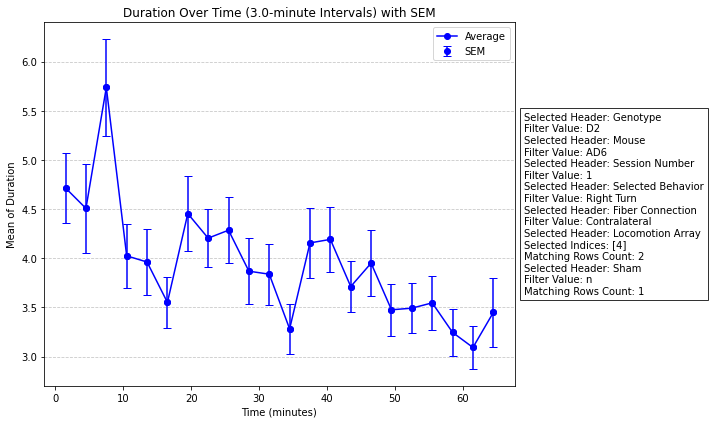

In [316]:
# Check if a JSON file containing plotted_data exists
try:
    with open("plotted_data.json", "r") as file:
        plotted_data = json.load(file)
except FileNotFoundError:
    # If the file doesn't exist, initialize an empty dictionary
    plotted_data = {}
# Assuming 'matching_tuples' contains the selected tuples
# and 'time_values' contains the corresponding time values

# Define the selected indices for start and end time
start_time_index = 5
end_time_index = 6
bin_width_minutes =5
# Define a dictionary to map index values to names
index_name_mapping = {
    0: 'Behavior',
    1: 'Stim Count',
    2: 'Frame Rate',
    3: 'Bouts',
    4: 'Duration',
    5: 'Start Time',
    6: 'End Time'
}

# Extract the name associated with the selected index
selected_index_name = index_name_mapping[selected_index]

selected_values = [tuple[selected_index]for tuple in values for row_index, values in matching_tuples.items()]

# Extract the start and end times from matching_tuples and convert to minutes
start_times = [tuple[start_time_index] / 600 for values in matching_tuples.values() for tuple in values]
end_times = [tuple[end_time_index] / 600 for values in matching_tuples.values() for tuple in values]


# Calculate the minimum and maximum times
min_time = 0
max_time = 65

# Create time bins
time_bins = np.arange(min_time, max_time + bin_width_minutes, bin_width_minutes)

# Initialize lists to store mean values and SEM
mean_values = []
sem_values = []


# Population size (N) is the total number of data points in your entire dataset
N = len(matching_tuples)

# Calculate the population average and standard deviation for the entire dataset
population_average = np.mean(selected_values)
population_std = np.std(selected_values, ddof=1)

# Print the population information as a single line with the selected index name
print(f"Selected Index Name: {selected_index_name}, Population Size (N): {N}, Population Average: {population_average}, Population Std Deviation: {population_std}")


# Integrate the new functionality to prompt the user for binning
user_choice = input("Do you want to graph the selected index with per minute with a specific bin length for each key? (yes/no): ")

if user_choice.lower() == "yes":

    # Define the selected bin width in minutes
    bin_width_minutes = float(input("Enter the bin width in minutes: "))
    
    # Initialize dictionaries to store mean values and SEM for each key
    key_mean_values = {}
    key_sem_values = {}
    # Initialize a dictionary to store bin counts for each key
    key_bin_counts = {}

    # Loop through each key in the 'matching_tuples' dictionary
    for key, values in matching_tuples.items():
        # Extract the selected index name associated with the key
        selected_index_name = index_name_mapping[selected_index]

        # Extract the selected values at the selected index for the current key
        selected_values = [tuple[selected_index] for tuple in values]

        # Extract the start and end times for the current key and convert to minutes
        start_times = [tuple[5] / 600 for tuple in values]
        end_times = [tuple[6] / 600 for tuple in values]

        # Create time bins
        time_bins = np.arange(min_time, max_time + bin_width_minutes, bin_width_minutes)

        # Initialize dictionaries to store bin values and bin start/end times
        bin_data = {
            'Bin Start Time': [],
            'Bin End Time': [],
            'Selected Values': [],
            'Bin Values': []
        }

        # Initialize a list to store bin counts for the current key
        bin_counts = []

        # Iterate through the time bins for the current key
        for bin_start, bin_end in zip(time_bins[:-1], time_bins[1:]):
            bin_values = []

            # Iterate through the data to collect values within this bin
            for start_time, end_time, value_at_selected_index in zip(start_times, end_times, selected_values):
                if start_time >= bin_start and end_time <= bin_end:
                    # Value at the selected index falls within this bin for the current key
                    bin_values.append(value_at_selected_index)

            # Append data to the bin_data dictionary for printing
            bin_data['Bin Start Time'].append(bin_start)
            bin_data['Bin End Time'].append(bin_end)
            bin_data['Selected Values'].append(selected_values)
            bin_data['Bin Values'].append(bin_values)

            # Calculate the number of elements in this bin and store it in bin_counts
            bin_count = len(bin_values)
            bin_counts.append(bin_count)

        # Store the bin counts for the current key in the key_bin_counts dictionary
        key_bin_counts[key] = bin_counts

    # Initialize a dictionary to store the result
    bin_counts_per_minute = {}

    # Iterate through the keys and their corresponding bin counts
    for key, bin_counts in key_bin_counts.items():
        # Divide each bin count by bin_width_in_minutes
        bin_counts_per_minute[key] = [count / bin_width_minutes for count in bin_counts]

    # Initialize a list to store the counts per minute for each bin across all keys
    all_bin_counts = [[] for _ in range(len(bin_counts_per_minute[next(iter(bin_counts_per_minute))]))]

    # Populate the list with counts per minute from all keys for each bin
    for counts_per_minute in bin_counts_per_minute.values():
        for i, count in enumerate(counts_per_minute):
            all_bin_counts[i].append(count)

    # Initialize lists to store the bin mean and SEM
    bin_means = []
    bin_sem = []

    # Calculate the mean and SEM for each bin across all keys
    for bin_counts in all_bin_counts:
        bin_mean = np.mean(bin_counts)  # Calculate the mean for the bin
        bin_means.append(bin_mean)  # Store the bin mean in the bin_means list

        # Use scipy to calculate the SEM for the bin
        sem = stats.sem(bin_counts)  # SEM
        bin_sem.append(sem)  # Store the SEM in the bin_sem list

    data = []

    for i, (bin_mean, sem) in enumerate(zip(bin_means, bin_sem), start=1):
        data.append([f"Bin {i}", f"{bin_mean:.2f} cpm", f"{sem:.2f}"])

    table = tabulate(data, headers=["Bin", "Avg (cpm)", "SEM"], tablefmt="grid")

    print(table)

    # Create a plot of counts per minute against time with error bars representing SEM
    plt.figure(figsize=(10, 6))
    plt.errorbar(
        time_bins[:-1] + bin_width_minutes / 2,  # X-axis values (middle of time bins)
        bin_means,                               # Y-axis values (mean values for each bin)
        yerr=bin_sem,                            # Error bars (SEM for each bin)
        marker='o',
        markersize=4,
        capsize=4,
        label=f'{selected_index_name} per Minute'
    )
    plt.xlabel('Time (minutes)')
    plt.ylabel(f'{selected_index_name}')

    # Check if the plot represents a Sham session from filtering criteria
    sham_detected = False  # Initialize a flag
    i = 0  # Initialize an index variable

    while i < len(filtering_criteria):
        criterion = filtering_criteria[i]

        if criterion == "Selected Header: Sham" and i + 1 < len(filtering_criteria) and filtering_criteria[i + 1] == "Filter Value: y":
            sham_detected = True
            break  # Exit the loop if Sham is detected

        i += 1

    # Set the plot title based on Sham detection
    if sham_detected:
        plot_title = f'{selected_index_name} per minute over time ({bin_width_minutes}-minute Intervals) with SEM - Sham'
    else:
        plot_title = f'{selected_index_name} per minute over time ({bin_width_minutes}-minute Intervals) with SEM'

    plt.title(plot_title)  # Set the plot title

    plt.grid(True)
    plt.legend()

    # Add a text box with filtering criteria to the far right
    text_box_content = "\n".join(filtering_criteria)
    plt.gca().text(1.02, 0.5, text_box_content, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8),
                    verticalalignment='center', fontsize=10)

    plt.tight_layout()  # Ensures that the text box does not interfere with other elements
    plt.show()

    # Check if the title already exists in the dictionary
    if plot_title in plotted_data:
        # If the title exists, find a unique title by appending a number
        i = 2
        while f"{plot_title} ({i})" in plotted_data:
            i += 1
        unique_plot_title = f"{plot_title} ({i})"
    else:
        unique_plot_title = plot_title
        
    # Convert NumPy arrays to lists
    x_axis_values = (time_bins[:-1] + bin_width_minutes / 2).tolist()

    # Update the plotted_data dictionary with lists instead of NumPy arrays
    plotted_data[unique_plot_title] = {
        'X-axis_values': x_axis_values,
        'Y-axis_values': bin_means,
        'SEM_values': bin_sem,
        'Label': f'{selected_index_name} per Minute',
        'X-axis_label': 'Time (minutes)',
        'Y-axis_label': selected_index_name,
        'Filtering_criteria': text_box_content,
        'Bin_data': bin_data  # You can store the bin data if needed
    }

    # Save the updated plotted_data to the JSON file
    with open("plotted_data.json", "w") as file:
        json.dump(plotted_data, file, indent=4)
    
else:
    binned_data = {}
    bin_width_minutes = float(input("Enter the bin width in minutes: "))
    for key, tuples in matching_tuples.items():
        # Extract the values for the selected index from each tuple in the list
        selected_values = [tuple[selected_index] for tuple in tuples]
        # Initialize a dictionary to store binned values for this key
        binned_values_dict = {}
        # Create time bins
        time_bins = np.arange(min_time, max_time + bin_width_minutes, bin_width_minutes)

        # Iterate through the time bins
        for bin_start, bin_end in zip(time_bins[:-1], time_bins[1:]):
            # Initialize a list to store values in this bin
            bin_values = []

            # Iterate through the data points for this key
            for start_time, end_time, value_at_selected_index in zip(start_times, end_times, selected_values):
                if start_time > bin_start and end_time <= bin_end:
                    # Value at the selected index falls within this bin for the current key
                    bin_values.append(value_at_selected_index)

            # Store the binned values for this bin in the dictionary
            binned_values_dict[(bin_start, bin_end)] = bin_values

        # Store the binned data for this key in the main dictionary
        binned_data[key] = binned_values_dict

    # Check the number of keys in the binned_data dictionary
    num_keys = len(binned_data)

    if num_keys == 1:
        # If there is only one key, calculate SEM based on the binned values for each bin
        single_key = next(iter(binned_data))  # Get the single key
        single_key_binned_values = binned_data[single_key]  # Binned values for the single key

        # Initialize a dictionary to store SEM values for each bin for the single key
        sem_per_bin = {}

        # Initialize a list to store data for the DataFrame
        data = []

        # Initialize lists to store bin information and values for plotting
        bin_starts = []
        bin_ends = []
        bin_midpoints = []
        bin_averages = []
        bin_sems = []

        # Iterate through the bins and their values
        for bin_key, bin_values in single_key_binned_values.items():
            # Calculate the SEM for this bin's values
            if len(bin_values) > 1:
                sem = np.std(bin_values, ddof=1) / np.sqrt(len(bin_values))
            else:
                sem = np.nan  # Set to NaN if there's insufficient data in the bin

            # Store the SEM value in the dictionary with the bin key as the identifier
            sem_per_bin[bin_key] = sem

            # Extract bin start and end for table
            bin_start, bin_end = bin_key
            bin_starts.append(bin_start)
            bin_ends.append(bin_end)

            # Calculate bin midpoint for plotting
            bin_midpoint = (bin_start + bin_end) / 2
            bin_midpoints.append(bin_midpoint)

            # Calculate the average for this bin
            bin_average = np.mean(bin_values)
            bin_averages.append(bin_average)

            # Store the SEM value for plotting
            bin_sems.append(sem)

            # Append the data to the list for the DataFrame
            data.append([bin_start, bin_end, bin_average, sem])  # Include SEM in the data

        # Create a DataFrame from the list
        df = pd.DataFrame(data, columns=['Bin Start', 'Bin End', 'Average', 'SEM'])

        # Print the table
        print(df)

        # Define the color for the line and error bars
        line_color = 'blue'

        # Create a line plot with error bars
        plt.figure(figsize=(10, 6))
        plt.plot(bin_midpoints, bin_averages, marker='o', color=line_color, label='Average')
        plt.errorbar(bin_midpoints, bin_averages, yerr=bin_sems, fmt='o', color=line_color, capsize=4, label='SEM')

        # Add labels and title
        plt.xlabel('Time (minutes)')
        plt.ylabel(f'Mean of {selected_index_name}')

        sham_detected = False  # Initialize a flag
        i = 0  # Initialize an index variable

        while i < len(filtering_criteria):
            criterion = filtering_criteria[i]

            if criterion == "Selected Header: Sham" and i + 1 < len(filtering_criteria) and filtering_criteria[i + 1] == "Filter Value: y":
                sham_detected = True
                break  # Exit the loop if Sham is detected

            i += 1

        # Set the plot title based on Sham detection
        if sham_detected:
            plot_title = f'{selected_index_name} Over Time ({bin_width_minutes}-minute Intervals) with SEM - Sham'
        else:
            plot_title = f'{selected_index_name} Over Time ({bin_width_minutes}-minute Intervals) with SEM'
        plt.title(plot_title)
        # Add legend
        plt.legend()

        # Add a text box with filtering criteria to the far right
        text_box_content = "\n".join(filtering_criteria)
        plt.gca().text(1.02, 0.5, text_box_content, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8),
                        verticalalignment='center', fontsize=10)

        # Show the plot
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()  # Ensures all elements fit within the figure
        plt.show()

        # Check if the title already exists in the dictionary
        if plot_title in plotted_data:
            # If the title exists, find a unique title by appending a number
            i = 2
            while f"{plot_title} ({i})" in plotted_data:
                i += 1
            unique_plot_title = f"{plot_title} ({i})"
        else:
            unique_plot_title = plot_title

        plotted_data[unique_plot_title] = {
            'X-axis_values': bin_midpoints,  # Use bin_midpoints as X-axis values
            'Y-axis_values': bin_averages,   # Use bin_averages as Y-axis values
            'SEM_values': bin_sems,          # Use bin_sems as SEM values
            'Label': f'{selected_index_name} over time',
            'X-axis_label': 'Time (minutes)',
            'Y-axis_label': selected_index_name,
            'Filtering_criteria': text_box_content,
            'Bin_data': bin_data,  # You can store the bin data if needed
            'Sham_detected': sham_detected  # Include Sham detection flag in the dictionary
        }

        # Save the updated plotted_data to the JSON file
        with open("plotted_data.json", "w") as file:
            json.dump(plotted_data, file, indent=4)
    else:
        # If there are multiple keys, perform the original SEM calculation across keys
        average_per_key = {}

        # Iterate through the binned data dictionary
        for key, binned_values_dict in binned_data.items():
            #print(f"Key: {key}")

            # Iterate through the bins and their values
            for bin_key, bin_values in binned_values_dict.items():
                bin_start, bin_end = bin_key
                #print(f"Bin ({bin_start:.2f} - {bin_end:.2f} minutes): {bin_values}")

            #print()  # Print an empty line to separate each key's output   

        # Initialize a dictionary to store the average of each bin for each key
        average_per_key = {}

        # Iterate through the binned data dictionary
        for key, binned_values_dict in binned_data.items():
            key_averages = {}  # Initialize a dictionary to store averages for this key

            # Iterate through the bins and their values for this key
            for bin_key, bin_values in binned_values_dict.items():
                # Check if the bin_values list is empty before calculating the mean
                if len(bin_values) > 0:
                    # Calculate the average for the current bin
                    bin_average = np.mean(bin_values)
                else:
                    bin_average = np.nan  # Set to NaN if the bin is empty

                # Store the bin average in the dictionary with the bin key as the identifier
                key_averages[bin_key] = bin_average

            # Store the average values for this key in the main dictionary
            average_per_key[key] = key_averages

            # Iterate through the average_per_key dictionary
        for key, key_averages in average_per_key.items():
            print(f"Key: {key}")

            # Iterate through the bins and their averages for this key
            for bin_key, bin_average in key_averages.items():
                bin_start, bin_end = bin_key
                print(f"Bin ({bin_start:.2f} - {bin_end:.2f} minutes) Average: {bin_average:.2f}")

            print()

        average_of_averages = {}  # Initialize a dictionary to store the average of averages for each bin
        sem_of_averages = {}      # Initialize a dictionary to store the SEM for each bin's average

        # Iterate through the bins (based on the first key, assuming all keys have the same bins)
        for bin_key in average_per_key[next(iter(average_per_key))]:
            bin_averages = []  # Initialize a list to store averages for this bin across keys

            # Iterate through the keys and their corresponding averages
            for key, key_averages in average_per_key.items():
                bin_average = key_averages.get(bin_key, np.nan)  # Get the average for this key and bin
                if not np.isnan(bin_average):
                    bin_averages.append(bin_average)

            # Calculate the average for this bin across keys and store it in the dictionary
            if bin_averages:
                bin_average_across_keys = np.mean(bin_averages)
                average_of_averages[bin_key] = bin_average_across_keys

                # Calculate the SEM for this bin's average
                sem = stats.sem(bin_averages)
                sem_of_averages[bin_key] = sem

        # Print the averages and SEMs for each bin
        for bin_key, bin_average in average_of_averages.items():
            bin_start, bin_end = bin_key
            bin_sem = sem_of_averages.get(bin_key, np.nan)
            #print(f"Bin ({bin_start:.2f} - {bin_end:.2f} minutes) Average of Averages: {bin_average:.2f} SEM: {bin_sem:.2f}")

      # Create a list to store data for the DataFrame
        data = []

        # Iterate through the bins and their averages
        for bin_key, bin_average in average_of_averages.items():
            bin_start, bin_end = bin_key
            bin_sem = sem_of_averages.get(bin_key, np.nan)

            # Append the data to the list
            data.append([bin_start, bin_end, bin_average, bin_sem])

        # Create a DataFrame from the list
        df = pd.DataFrame(data, columns=['Bin Start', 'Bin End', 'Average', 'SEM'])

        # Display the DataFrame
        print(df)

        # Extract bin information and values
        bin_starts, bin_ends = zip(*average_of_averages.keys())
        bin_averages = list(average_of_averages.values())
        bin_sems = list(sem_of_averages.values())

        # Convert bin starts and ends to midpoint values for plotting
        bin_midpoints = [(start + end) / 2 for start, end in zip(bin_starts, bin_ends)]

        # Define the color for the line and error bars
        line_color = 'blue'

        # Create a line plot with error bars
        plt.figure(figsize=(10, 6))
        plt.plot(bin_midpoints, bin_averages, marker='o', color=line_color, label='Average')
        plt.errorbar(bin_midpoints, bin_averages, yerr=bin_sems, fmt='o', color=line_color, capsize=4, label='SEM')

        # Add labels and title
        plt.xlabel('Time (minutes)')
        plt.ylabel(f'Mean of {selected_index_name}')
        sham_detected = False  # Initialize a flag
        i = 0  # Initialize an index variable

        while i < len(filtering_criteria):
            criterion = filtering_criteria[i]

            if criterion == "Selected Header: Sham" and i + 1 < len(filtering_criteria) and filtering_criteria[i + 1] == "Filter Value: y":
                sham_detected = True
                break  # Exit the loop if Sham is detected

            i += 1

        # Set the plot title based on Sham detection
        if sham_detected:
            plot_title = f'{selected_index_name} Over Time ({bin_width_minutes}-minute Intervals) with SEM - Sham'
        else:
            plot_title = f'{selected_index_name} Over Time ({bin_width_minutes}-minute Intervals) with SEM'
        plt.title(plot_title)
        # Add legend
        plt.legend()

        # Add a text box with filtering criteria to the far right
        text_box_content = "\n".join(filtering_criteria)
        plt.gca().text(1.02, 0.5, text_box_content, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8),
                        verticalalignment='center', fontsize=10)

        # Show the plot
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()  # Ensures all elements fit within the figure
        plt.show()

        # Check if the title already exists in the dictionary
        if plot_title in plotted_data:
            # If the title exists, find a unique title by appending a number
            i = 2
            while f"{plot_title} ({i})" in plotted_data:
                i += 1
            unique_plot_title = f"{plot_title} ({i})"
        else:
            unique_plot_title = plot_title

        plotted_data[unique_plot_title] = {
        'X-axis_values': bin_midpoints,  # Use bin_midpoints as X-axis values
        'Y-axis_values': bin_averages,   # Use bin_averages as Y-axis values
        'SEM_values': bin_sems,          # Use bin_sems as SEM values
        'Label': f'{selected_index_name} over tie',
        'X-axis_label': 'Time (minutes)',
        'Y-axis_label': selected_index_name,
        'Filtering_criteria': text_box_content,
        'Bin_data': bin_data,  # You can store the bin data if needed
        'Sham_detected': sham_detected  # Include Sham detection flag in the dictionary
    }

        # Save the updated plotted_data to the JSON file
        with open("plotted_data.json", "w") as file:
            json.dump(plotted_data, file, indent=4)

In [306]:
# Load the plotted_data dictionary from the JSON file
try:
    with open("plotted_data.json", "r") as file:
        plotted_data = json.load(file)
except FileNotFoundError:
    plotted_data = {}  # Initialize an empty dictionary if the file doesn't exist

# List available dictionaries for plotting
available_dicts = list(plotted_data.keys())

if not available_dicts:
    print("No data available for plotting.")
    exit()

print("Available dictionaries for plotting:")
for i, dictionary in enumerate(available_dicts, 1):
    print(f"{i}. {dictionary}")

# Ask the user how they want to select dictionaries for plotting
while True:
    user_input = input("Enter 'all' to select all dictionaries, a range (e.g., '2-5'), or individual numbers (e.g., '1 3 4'): ").strip()

    if user_input.lower() == 'all':
        selected_indices = list(range(len(available_dicts)))  # Select all dictionaries
        break
    elif '-' in user_input:
        range_parts = user_input.split('-')
        if len(range_parts) == 2 and range_parts[0].isnumeric() and range_parts[1].isnumeric():
            start_idx = int(range_parts[0]) - 1
            end_idx = int(range_parts[1])
            if 0 <= start_idx < end_idx <= len(available_dicts):
                selected_indices = list(range(start_idx, end_idx))  # Select a range
                break
            else:
                print("Invalid range. Please enter a valid range.")
        else:
            print("Invalid input. Please enter a valid range (e.g., '2-5').")
    else:
        selected_numbers = user_input.split()
        if all(num.isnumeric() for num in selected_numbers):
            selected_indices = [int(num) - 1 for num in selected_numbers if 0 < int(num) <= len(available_dicts)]
            if selected_indices:
                break
            else:
                print("Invalid numbers. Please enter valid numbers.")
        else:
            print("Invalid input. Please enter 'all', a valid range, or valid numbers.")

# Initialize a dictionary to store SEM values for each time
sem_values_by_time = {}

# Initialize lists to store combined data
combined_data = []

# Initialize the plot title to None
plot_title = None

# Iterate through the selected dictionaries and combine the data
for idx in selected_indices:
    dictionary = available_dicts[idx]
    data = plotted_data[dictionary]

    x_axis_values = data.get('X-axis_values', [])
    y_axis_values = data.get('Y-axis_values', [])
    sem_values = data.get('SEM_values', [])
    label = data.get('Label', '')

    # Append the data as a tuple (x, y, sem, label) to the combined_data list
    combined_data.append((x_axis_values, y_axis_values, sem_values, label))

    # Group Y values by time
    for i, time in enumerate(x_axis_values):
        if time not in sem_values_by_time:
            sem_values_by_time[time] = []
        sem_values_by_time[time].append(y_axis_values[i])

# Create a single plot for all the combined data
for x_values, y_values, sem, label in combined_data:
    plt.errorbar(
        x_values,
        y_values,
        yerr=sem if len(sem) > 0 else None,  # Use SEM values from the dictionary if available
        marker='o',
        markersize=4,
        capsize=4,
        label=label
    )

# Set labels and title for the plot
plt.xlabel(data.get('X-axis_label', ''))
plt.ylabel(data.get('Y-axis_label', ''))

# Extract the part of the title before "SEM"
if plot_title:
    plot_title = plot_key.split("with")[0].strip()
plt.title(plot_title)  # Set the plot title

# Show grid and legend
plt.grid(True)
# Place the legend outside the plot and specify the bbox_to_anchor
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Calculate the SEM for each time and store the values
sem_values_by_time_result = []
for time, values in sem_values_by_time.items():
    if len(values) < 2:
        continue

    sem = np.std(values) / np.sqrt(len(values))
    sem_values_by_time_result.append([time, sem])  # Store time and SEM in a list

# Print the SEM values as a table with a title
table = tabulate(sem_values_by_time_result, headers=["Time", "SEM"], tablefmt="fancy_grid")
print("SEM Values of Combined Plot")
print(table)

# Display the plot
plt.show()

Available dictionaries for plotting:
1. Bouts Over Time (5.0-minute Intervals) with SEM
2. Duration Over Time (3.0-minute Intervals) with SEM
3. Duration Over Time (3.0-minute Intervals) with SEM (2)


KeyboardInterrupt: Interrupted by user

In [278]:

# Print the plotted_data dictionary
pprint.pprint(len(plotted_data))

0


In [279]:

# To print specific keys and their corresponding values, you can iterate through the dictionary
for key, value in plotted_data.items():
    print(f"Key: {key}")
    print("\n")

In [318]:
pprint.pprint(plotted_data)

{}


plotted_data.clear()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define a dictionary to map index values to names
index_name_mapping = {
    0: 'Behavior',
    1: 'Stim Count',
    2: 'Frame Rate',
    3: 'Bouts',
    4: 'Duration',
    5: 'Start Time',
    6: 'End Time'
}

def process_matching_tuples(matching_tuples):
    # Prompt the user to upload the first matching tuple and select the variable
    first_variable = input("Upload the first matching tuple. Enter a variable name for it: ")
    selected_index = int(input(f"Select an index for {first_variable}: "))
    selected_index_name = index_name_mapping[selected_index]
    selected_values = [tuple[selected_index] for tuple in matching_tuples]

    # Prompt the user to upload the second matching tuple and select the variable
    second_variable = input("Upload the second matching tuple. Enter a variable name for it: ")
    selected_index2 = int(input(f"Select an index for {second_variable}: "))
    selected_index_name2 = index_name_mapping[selected_index2]
    selected_values2 = [tuple[selected_index2] for tuple in matching_tuples]

    # Extract the start and end times from matching_tuples and convert to minutes
    start_times = [tuple[start_time_index] / 600 for tuple in matching_tuples]
    end_times = [tuple[end_time_index] / 600 for tuple in matching_tuples]

    # Define the bin width in minutes
    bin_width_minutes = 3  # Adjust the bin width as needed

    # Calculate the minimum and maximum times
    min_time = 0
    max_time = 65

    # Create time bins
    time_bins = np.arange(min_time, max_time + bin_width_minutes, bin_width_minutes)

    # Initialize lists to store counts, start times, end times, and SEM per bin for both variables
    counts1 = []
    counts2 = []
    start_times_bin = []
    end_times_bin = []
    sem_values1 = []  # To store SEM per bin for variable 1
    sem_values2 = []  # To store SEM per bin for variable 2

    # Iterate through the time bins
    for bin_start, bin_end in zip(time_bins[:-1], time_bins[1:]):
        bin_values1 = []
        bin_values2 = []

        # Iterate through the data to collect values within this bin for both variables
        for start_time, end_time, value1, value2 in zip(start_times, end_times, selected_values, selected_values2):
            if start_time > bin_start and end_time <= bin_end:
                # Data falls within this bin
                bin_values1.append(value1)
                bin_values2.append(value2)

        # Calculate the count of elements within the bin for both variables
        bin_count1 = len(bin_values1)
        bin_count2 = len(bin_values2)

        # Calculate the standard error of the mean (SEM) for both variables
        sem1 = 0  # Initialize SEM for variable 1 for this bin
        sem2 = 0  # Initialize SEM for variable 2 for this bin
        if bin_count1 > 0:
            sem1 = np.std(bin_values1, ddof=1) / np.sqrt(bin_count1) / bin_width_minutes
        if bin_count2 > 0:
            sem2 = np.std(bin_values2, ddof=1) / np.sqrt(bin_count2) / bin_width_minutes

        # Append values to respective lists
        counts1.append(bin_count1)
        counts2.append(bin_count2)
        start_times_bin.append(bin_start)
        end_times_bin.append(bin_end)
        sem_values1.append(sem1)  # Append the calculated SEM for variable 1
        sem_values2.append(sem2)  # Append the calculated SEM for variable 2

    # Calculate the difference between the bins for both variables
    difference_values = [val1 - val2 for val1, val2 in zip(counts1, counts2)]

    middle_of_bins = [start + bin_width_minutes / 2 for start in start_times_bin]

    # Create a DataFrame to store the bin statistics for both variables and the difference
    result_df = pd.DataFrame({
        'Start Time': start_times_bin,
        'End Time': end_times_bin,
        f'Sum ({first_variable})': counts1,
        f'Sum ({second_variable})': counts2,
        f'Difference ({first_variable} - {second_variable})': difference_values,
        f'SEM ({first_variable})': sem_values1,
        f'SEM ({second_variable})': sem_values2
    })

    # Display the DataFrame
    print(result_df)

    # Create a plot of the difference between counts per minute with error bars representing SEM for both variables
    plt.figure(figsize=(10, 6))
    plt.errorbar(middle_of_bins, difference_values, yerr=sem_values1, marker='o', markersize=4, capsize=4, label=f'{first_variable} - {second_variable}')
    plt.xlabel('Time (minutes)')
    plt.ylabel(f'Difference ({first_variable} - {second_variable})')
    plt.title(f'Difference between {first_variable} and {second_variable} per Minute Over Time ({bin_width_minutes}-minute Intervals) with SEM')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming 'matching_tuples' contains the selected tuples
# and 'time_values' contains the corresponding time values

# Define the selected indices for start and end time
start_time_index = 5
end_time_index = 6

# Extract the name associated with the selected index
selected_index = int(input("Select an index for the variables: "))
matching_tuples = []  # Initialize the list of matching tuples

# Prompt the user to upload matching tuples and add them to the list
while True:
    user_choice = input("Do you want to upload a matching tuple? (yes/no): ")
    if user_choice.lower() == "yes":
        matching_tuple = tuple(float(x) for x in input("Enter values for the matching tuple separated by spaces: ").split())
        matching_tuples.append(matching_tuple)
    else:
        break

# Process the matching tuples and plot the difference
process_matching_tuples(matching_tuples)

In [283]:
import os

save_directory = "Z:\\KayCei\\Matching Tuples CSV"  # Replace with the desired directory path

# After filtering and obtaining matching_tuples, you can export them to a CSV file like this:
if len(matching_tuples) > 0:
    # Create a DataFrame from the list of matching tuples
    matching_tuples_df = pd.DataFrame(matching_tuples)

    # Create the full path to the CSV file in the specified directory
    csv_filename = os.path.join(save_directory, "matching_tuples.csv")

    # Export the DataFrame to the specified CSV file path
    matching_tuples_df.to_csv(csv_filename, index=False)

    print(f"Matching tuples have been exported to {csv_filename}.")
else:
    print("No matching tuples to export.")

ValueError: All arrays must be of the same length

# DONT NOT USE

In [ ]:
fps is 30  1 behavior is 1/30

In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_possible_indices(tuples):
    if tuples and isinstance(tuples[0], tuple):
        return range(len(tuples[0]))
    return []

while True:
    start_filtering = input("Do you want to start filtering? (y/n): ")
    if start_filtering.lower() != 'y':
        print("Filtering process cancelled.")
        break

    array_columns = [col for col in matching_rows.columns if "array" in col.lower()]

    print("Available columns with 'array' in their names:")
    for idx, col in enumerate(array_columns):
        print(f"{idx}: {col}")

    selected_column_index = int(input("Enter the number of the column you want to use for values: "))
    selected_column_name = array_columns[selected_column_index]

    if "array" in selected_column_name.lower():
        tuple_cells = matching_rows[selected_column_name].tolist()

        possible_indices = get_possible_indices(ast.literal_eval(tuple_cells[0]))
        print("\nAvailable indices for the elements within tuples:")
        print(possible_indices)

        selected_index = int(input("Enter the index of the element you want to plot: "))

        if selected_index == 3:
            print("Index 3 represents time, please select a different index.")
        elif selected_index==2:
            generate_duration_plot = input("Do you want to generate a duration plot? (y/n): ")
            if generate_duration_plot.lower() == 'y':
                plt.figure()

                durations = []
                max_y_length = 0
                
                for cell in tuple_cells:
                    tuple_data = ast.literal_eval(cell)
                    if len(tuple_data) > selected_index and len(tuple_data) > 4:
                        y_values = [x[selected_index] for x in tuple_data]

                        if len(y_values) > max_y_length:
                            max_y_length = len(y_values)

                        durations.append(((tuple_data[-1][3] - tuple_data[0][1]) / 10))  # Calculate duration

                x_values = list(range(1, max_y_length + 1))
                avg_durations = np.zeros(max_y_length)

                for duration in durations:
                    for i in range(len(x_values)):
                        if i < len(duration):
                            avg_durations[i] += duration[i]

                avg_durations /= len(durations)

                plt.plot(x_values, avg_durations, label='Average Duration')
                plt.xlabel('Index position')
                plt.ylabel('Average Duration (seconds)')
                plt.title(f'Average Duration Plot for Index {selected_index}')
                plt.grid(False)
                plt.legend()
                plt.show()

    continue_input = input("Do you want to continue? (y/n): ")
    if continue_input.lower() == 'n':
        break


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bin_data(x_values, selected_index):
    # Bin the data based on x values
    bin_start = 0
    bin_increment = 300
    bins = np.arange(bin_start, max(x_values) + bin_increment, bin_increment)

    # Create a histogram
    hist, bin_edges = np.histogram(x_values, bins=bins)

    return hist, bin_edges

if x_values and y_values:
    # Call the binning function
    hist, bin_edges = bin_data(x_values, selected_index)
    print(selected_index)
    # Display the histogram
    plt.figure()
    plt.hist(x_values, bins=bin_edges, alpha=0.7)
    plt.xlabel(f'Value at Index {selected_index}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Values at Index {selected_index}')
    plt.grid()

    plt.show()
else:
    print(f"No valid data found for plotting.")
   
# Print the values for each bin
for i, value in enumerate(hist):
    bin_center = (bin_edges[i] + bin_edges[i + 1]) / 2
    print(f"Bin {i+1}: Range {bin_edges[i]} - {bin_edges[i+1]}, Value: {bin_center}, Frequency: {value}")

plt.show()



In [ ]:
mean and sem 

In [ ]:
add index for individual tuples

In [ ]:
AD6 on a given day what is the first 

In [ ]:
## mask = []

for i, x in enumerate(tuples_list):
    found_true_for_index = False   # Reset the flag for each new row 'x'
    
    # Check if 'tup' is present in the current row 'x'
    if tup in x:
        if len(tup) > selected_index:
            # Extract the value at 'selected_index'
            value_at_selected_index = x[selected_index]
            if range_min <= value_at_selected_index <= range_max:
                mask.append(True)       # Append True to the mask
                found_true_for_index = True  # Set flag to True for this index
            else:
                mask.append(False)
        else:
            mask.append(False)
    else:
        mask.append(False)

    # Skip the rest of 'tup' once a True value is found for this index
    if found_true_for_index:
        break


In [ ]:
### Find columns with "array" in their names
array_columns = [col for col in matching_rows.columns if "array" in col.lower()]
print("Available columns with 'array' in their names:")
for idx, col in enumerate(array_columns):
    print(f"{idx}: {col}")

# Prompt user to select a column
selected_column_index = int(input("Enter the number of the column you want to use for values: "))
selected_column_name = array_columns[selected_column_index]

# Define the mapping of tuple indices to column names
tuple_index_to_column = {
    0: 'behavior',
    1: 'duration/count',
    2: 'bout',
    3: 'time (deciseconds)'
}

for idx, col_name in tuple_index_to_column.items():
    new_column_name = f"{selected_column_name}_{col_name}"
    matching_rows.loc[:, new_column_name] = None  # Add new column with None values

# Iterate through each row
for index, row in matching_rows.iterrows():
    array_data_str = row[selected_column_name]
    # Check if the content is a valid list
    try:
        array_data = ast.literal_eval(array_data_str)
        if not isinstance(array_data, list):
            continue  # Skip this row if array_data is not a list
    except (SyntaxError, ValueError, IndexError):
        print(f'Error occurred while processing array_data in row {index}: {array_data_str}')
        continue  # Skip this row if literal_eval encounters an error
    
    print(f"Extracted array_data for row {index}: {array_data}")  # Print the array_data
    
    # Process the list of tuples
    for tuple_elements in array_data:
        try:
            if not isinstance(tuple_elements, tuple):
                print("Error: This is not a tuple:", tuple_elements)
                continue
                
            processed_tuple = (float(tuple_elements[0]),) + tuple(map(int, tuple_elements[1:]))
                
            # Extract and update columns as before
            for idx, element in enumerate(processed_tuple):
                column_name = tuple_index_to_column.get(idx)
                if column_name:
                    new_column_name = f"{selected_column_name}_{column_name}"
                    if matching_rows.at[index, new_column_name] is None:
                        matching_rows.at[index, new_column_name] = []  # Initialize with empty list
                    matching_rows.at[index, new_column_name].append(element)
        except (ValueError):
            print("A value error occurred while processing tuple_elements:", tuple_elements)
        except (SyntaxError):
            print("A syntax error occurred while processing tuple_elements:", tuple_elements)

# Display the resulting DataFrame
print(matching_rows)

In [ ]:
# Create a list of newly added column names
newly_added_columns = [f"{selected_column_name}_{col_name}" for col_name in tuple_index_to_column.values()]

# Prompt user to select a column for binning
print("Available columns for binning:")
for idx, col_name in enumerate(newly_added_columns):
    print(f"{idx}: {col_name}")

selected_binning_column_index = int(input("Enter the number of the column you want to use for bins: "))

if 0 <= selected_binning_column_index < len(newly_added_columns):
    selected_binning_column_name = newly_added_columns[selected_binning_column_index]

    # Create a dictionary to store values for each row
    values_dict = {}

    # Create a dictionary to store time values for each row
    time_dictionary = {}

    for idx, row in matching_rows.iterrows():
        # Get the value of the selected column for the current row
        value = row[selected_binning_column_name]

        # Add the value to the values_dict for the current row
        values_dict[idx] = value

        # Get the time value for the current row
        time_column = [col for col in row.index if "time (deciseconds)" in col.lower()]
        if time_column:
            time_value = row[time_column[0]]
            time_dictionary[idx] = time_value

    # Display the resulting dictionaries
    print("Values Dictionary:")
    for row_index, value in values_dict.items():
        print(f"Row {row_index}: {value}")

    print("\nTime Dictionary:")
    for row_index, time_value in time_dictionary.items():
        print(f"Row {row_index}: {time_value}")
else:
    print("Invalid selection. Please choose a valid index.")



In [ ]:
# Iterate through values in the values_dict dictionary and retrieve corresponding time values
print("Values and Time Dictionary Values:")
for row_index, value in values_dict.items():
    time_value = time_dictionary.get(row_index)  # Retrieve time value using the same key
    print(f"Row {row_index}: Value: {value}, Time Value: {time_value}")



In [ ]:
3000,6000,9000,12000,15000,18000,21000,24000,27000,30000,31000,34000,39000,42000]

In [ ]:
output_path = input("Enter the full path of the directory where you want to save the CSV file: ")
output_filename = input("Enter the name of the CSV file to save the filtered data: ")
output_file_path = f"{output_path}/{output_filename}"

matching_rows.to_csv(output_file_path, index=False)

print(f"Filtered data has been saved to {output_file_path}.")

In [17]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_possible_indices(tuples):
    index_to_label = {
        0: "Behavior,0",
        1: "Stim Count,1",
        2: "Frame Rate,2",
        3: "Bouts,3",
        4: "Duration,4", 
        5: "Start Time,5", 
        6: "End Time,6"

    }
    if tuples and isinstance(tuples[0], tuple):
        return [index_to_label[i] if i in index_to_label else f"Unknown Label {i}" for i in range(len(tuples[0]))]
    return []

while True:
    start_filtering = input("Do you want to start filtering? (y/n): ")
    if start_filtering.lower() != 'y':
        print("Filtering process cancelled.")
        break

    array_columns = [col for col in matching_rows.columns if "array" in col.lower()]

    print("Available columns with 'array' in their names:")
    for idx, col in enumerate(array_columns):
        print(f"{idx}: {col}")

    selected_column_index = int(input("Enter the number of the column you want to use for values: "))
    selected_column_name = array_columns[selected_column_index]

    if "array" in selected_column_name.lower():
        tuple_cells = matching_rows[selected_column_name].tolist()

        possible_indices = get_possible_indices(tuple_cells[0])
        print("\nAvailable indices for the elements within tuples:")
        print(possible_indices)

        selected_index = int(input("Enter the index of the element you want to plot: "))
        
        if selected_index == 3:
            print("Index 3 represents time, please select a different index.")
        elif selected_index in possible_indices:
            plt.figure()

            for cell in tuple_cells:
                x_values = []
                y_values = []

                tuple_data = ast.literal_eval(cell)
                if len(tuple_data) > selected_index and len(tuple_data) > 7:
                    for x in tuple_data:
                        x_values.append(((x[3]-x[1])/10))  # Time at index 4
                        y_values.append(x[selected_index])  # Convert y value to minutes

                    if x_values and y_values:
                        title = 'Bouts' if selected_index == 2 else 'Counts'
                        plt.plot(x_values, y_values, label=f'Row {tuple_cells.index(cell) + 1}')
            
            plt.xlabel('Time (seconds)')
            plt.ylabel(f'Value at Index {selected_index} (in minutes)')
            plt.title(f'Combined Line Plot: Index {selected_index} vs. Time (Index 4) - {title}')
            plt.grid(False)
            plt.legend()
            plt.show()

    continue_input = input("Do you want to continue? (y/n): ")
    if continue_input.lower() == 'n':
        break


Do you want to start filtering? (y/n): y
Available columns with 'array' in their names:
0: Right Turn Array
1: Right Turn Array Continue
2: Locomotion Array
3: Locomotion Array Continue
4: Face Groom Array
5: Face Groom Array Continue
Enter the number of the column you want to use for values: 0

Available indices for the elements within tuples:
[]
Enter the index of the element you want to plot: 5
Do you want to continue? (y/n): n
